In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Datan lähteet

Väestön alustava sukupuoli ja ikäjakauma on generoitu seuraavan tilastokeskuksen tilaston perusteella:\
StatFin / Väestö / Väestörakenne / 11rd -- Väestö iän (1-v. 0-112) ja sukupuolen mukaan, 1972-2020 \
https://pxnet2.stat.fi/PXWeb/pxweb/fi/StatFin/StatFin__vrm__vaerak/statfin_vaerak_pxt_11rd.px/chart/chartViewColumn/
ko. tilastosta on käytetty vuotta 2020

Eliniän simuloinnissa on käytetty seuraavaa tilastokeskuksen tilastoa:\
StatFin / Väestö / Kuolleet / 12ap -- Kuolleisuus- ja eloonjäämislukuja iän ja sukupuolen mukaan, 1986-2020
https://pxnet2.stat.fi/PXWeb/pxweb/fi/StatFin/StatFin__vrm__kuol/statfin_kuol_pxt_12ap.px/chart/chartViewColumn/
ko. tilastosta on käytetty vuotta 2020

(EI KÄYTÖSSÄ) Eliniän simuloinnissa on käytetty seuraavaa tilastokeskuksen tilastoa:\
StatFin / Väestö / Kuolleet / 12ag -- Kuolleet iän (1-v.) ja sukupuolen mukaan, 1980-2020
https://pxnet2.stat.fi/PXWeb/pxweb/fi/StatFin/StatFin__vrm__kuol/statfin_kuol_pxt_12ag.px/chart/chartViewColumn/ \
ko. tilastosta on käytetty vuotta 2020

Syntyvyyden simuloinnissa on käytetty seuraavaa tilastokeskuksen tilastoa:\
/ StatFin / Väestö / Syntyneet / 12dm -- Elävänä syntyneet sukupuolen, järjestysluvun ja äidin iän (1-v.) mukaan, 1990-2020 \
https://pxnet2.stat.fi/PXWeb/pxweb/fi/StatFin/StatFin__vrm__synt/statfin_synt_pxt_12dm.px/table/tableViewLayout1/ \
ko. tilastosta on käytetty vuotta 2020

### Constants

In [2]:
SEXES = [0, 1] # 0 = male, 1 = female
MAX_AGE = 120

### Population by age and gender

In [3]:
stats_population_df = pd.read_csv(os.path.join(os.pardir, 'data', '004_11rd_2020_20220319-004320.csv'), encoding='iso-8859-1', skiprows=2, delimiter=";")

def tilastokeskus_transform_population_dataframe(df):
    df['sex'] = df['Sukupuoli'].apply(lambda x: 1 if x == 'Miehet' else 0)
    df.rename(columns={'2020': 'population_count', 'Ikä': 'age'}, inplace=True)
    df.drop(df.columns.difference(['sex', 'population_count', 'age']), 1, inplace=True)
    return df


tilastokeskus_transform_population_dataframe(stats_population_df)

,age,population_count,sex
0,0,23806,1
1,1,23459,1
2,2,25012,1
3,3,26298,1
4,4,27634,1
...,...,...,...
221,108,5,0
222,109,0,0
223,110,0,0
224,111,0,0


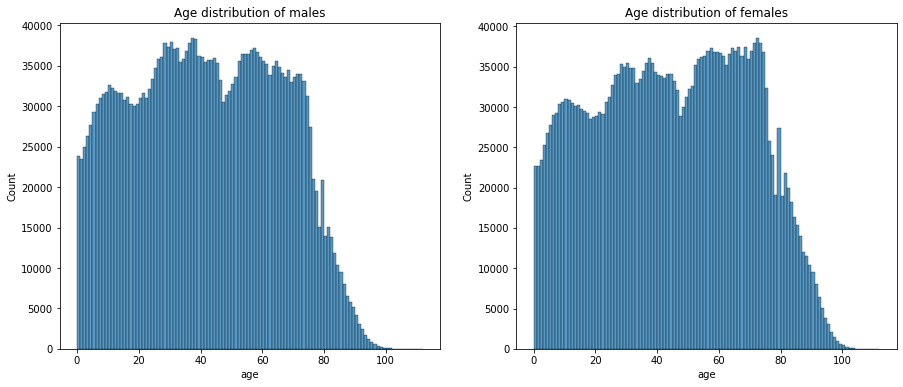

In [110]:
def plot_population_age_distributions_by_sex(df, year=None, aggregated=True):
    a4_dims = (15, 6)
    fig, ax = plt.subplots(1, 2, figsize=a4_dims)
    if not aggregated:
        df = df.groupby(['sex', 'age']).size().reset_index(name='population_count')
    males = df[df['sex'] == 1]
    females = df[df['sex'] == 0]
    mp = sns.histplot(x=males['age'], weights=males['population_count'], binwidth=1, ax=ax[0])
    mp.set_title(f"Age distribution of males{' - {}'.format(year) if year else ''}")
    fp = sns.histplot(x=females['age'], weights=females['population_count'], binwidth=1, ax=ax[1])
    fp.set_title(f"Age distribution of females{' - {}'.format(year) if year else ''}")
    fig.show()


plot_population_age_distributions_by_sex(stats_population_df)

### Lifetime by gender and age

In [5]:
stats_lifetime_df = pd.read_csv(os.path.join(os.pardir, 'data', '002_12ag_2020_20220318-232408.csv'), encoding='iso-8859-1', skiprows=2, delimiter=";")

def tilastokeskus_transform_lifetime_dataframe(df):
    df['sex'] = df['Sukupuoli'].apply(lambda x: 1 if x == 'Miehet' else 0)
    df.rename(columns={'2020': 'dead_count', 'Ikä': 'age'}, inplace=True)
    df.drop(df.columns.difference(['sex', 'dead_count', 'age']), 1, inplace=True)
    return df


tilastokeskus_transform_lifetime_dataframe(stats_lifetime_df)

,age,dead_count,sex
0,0,49,1
1,1,5,1
2,2,2,1
3,3,3,1
4,4,5,1
...,...,...,...
221,108,1,0
222,109,2,0
223,110,1,0
224,111,0,0


In [107]:
def plot_lifetime_distributions_by_sex(df):
    a4_dims = (15, 6)
    fig, ax = plt.subplots(1, 2, figsize=a4_dims)
    males = df[df['sex'] == 1]
    females = df[df['sex'] == 0]
    mp = sns.histplot(data=males, x=males['age'], weights=males['dead_count'], binwidth=1, ax=ax[0])
    mp.set_title("Lifetime distribution of males")
    fp = sns.histplot(data=females, x=females['age'], weights=females['dead_count'], binwidth=1, ax=ax[1])
    fp.set_title("Lifetime distribution of females")
    fig.show()

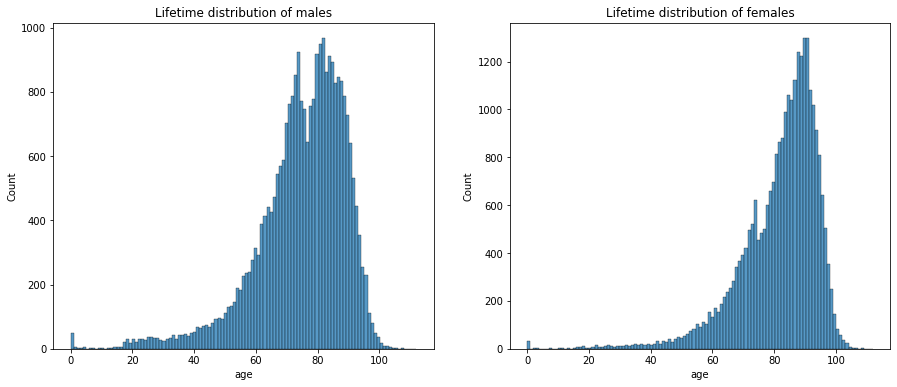

In [7]:
plot_lifetime_distributions_by_sex(stats_lifetime_df)

### Risk of death

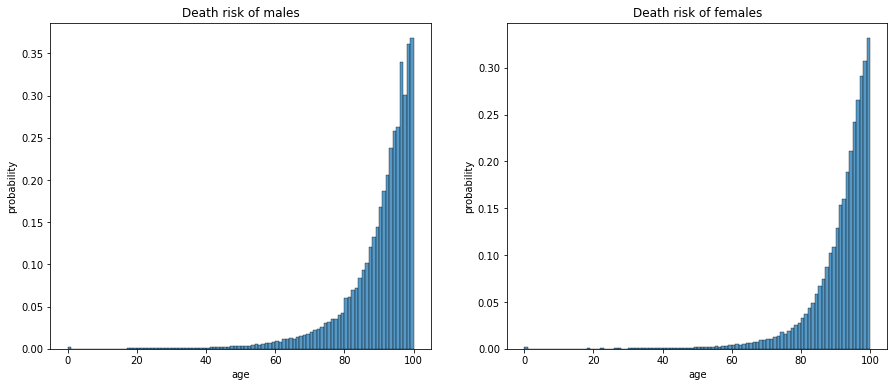

In [124]:
stats_death_risk_df = pd.read_csv(os.path.join(os.pardir, 'data', '008_12ap_2020_20220321-001345.csv'), 
                                  encoding='iso-8859-1', skiprows=2, delimiter=";")
def tilastokeskus_transform_deathrisk_dataframe(df):
    df['sex'] = df['Sukupuoli'].apply(lambda x: 1 if x == 'Miehet' else 0)
    df.rename(columns={'2020': 'death_probability', 'Ikä': 'age'}, inplace=True)
    df['death_probability'] = df['death_probability'].apply(pd.to_numeric, errors='coerce')
    df['death_probability'] = df['death_probability'] / 1000
    df.drop(df.columns.difference(['sex', 'death_probability', 'age']), 1, inplace=True)
    df.dropna(inplace=True)
    return df


def plot_risk_of_death_distributions_by_sex(df):
    a4_dims = (15, 6)
    fig, ax = plt.subplots(1, 2, figsize=a4_dims)
    males = df[df['sex'] == 1]
    females = df[df['sex'] == 0]
    mp = sns.histplot(x=males['age'], weights=males['death_probability'], binrange=(males['age'].min(), males['age'].max() + 1), binwidth=1, ax=ax[0])
    mp.set_title("Death risk of males")
    ax[0].set(ylabel='probability')
    fp = sns.histplot(x=females['age'], weights=females['death_probability'], binrange=(females['age'].min(), females['age'].max() + 1), binwidth=1, ax=ax[1])
    fp.set_title("Death risk of females")
    ax[1].set(ylabel='probability')
    fig.show()


tilastokeskus_transform_deathrisk_dataframe(stats_death_risk_df)
plot_risk_of_death_distributions_by_sex(stats_death_risk_df)

In [9]:
SEX_AGE_INDEX_GAP = 1000

assert SEX_AGE_INDEX_GAP > MAX_AGE

# Sex and age to index value
def get_sex_age_index_value(sex, age):
    return sex * SEX_AGE_INDEX_GAP + age

# Inverse for get_sex_age_index_value
def sex_and_age_from_index_value(sex_age_index_value):
    return (int(sex_age_index_value >= SEX_AGE_INDEX_GAP), sex_age_index_value % SEX_AGE_INDEX_GAP)


death_probability_by_sex_and_age_index = {}
death_probability_by_sex_and_age = {0: {}, 1: {}}
for _, row in stats_death_risk_df.iterrows():
    death_probability_by_sex_and_age[row['sex']][row['age']] = row['death_probability']

# TODO this is simple prefill assuming death risk is constant after -> use increasing death risk
for sex in SEXES:
    given_max_age = int(max(death_probability_by_sex_and_age[sex].keys()))
    for age in range(given_max_age + 1, MAX_AGE + 1):
        death_probability_by_sex_and_age[sex][age] =  death_probability_by_sex_and_age[sex][given_max_age]
    # Let's make sure that there is upper limit for the age
    death_probability_by_sex_and_age[sex][MAX_AGE] = 1

for sex in death_probability_by_sex_and_age:
    for age in death_probability_by_sex_and_age[sex]:
        death_probability_by_sex_and_age_index[get_sex_age_index_value(sex, age)] = death_probability_by_sex_and_age[sex][age]

### Initialize simulation population

In [125]:
INITIAL_POPULATION_SIZE = stats_population_df['population_count'].sum()

ages = np.zeros(INITIAL_POPULATION_SIZE, dtype=int)
sexes = np.zeros(INITIAL_POPULATION_SIZE, dtype=int)
# This is artificial index so that we can utilize vectorized operations for the dataframe (millions of rows are too slow without vectorization)
sex_age_index = np.zeros(INITIAL_POPULATION_SIZE, dtype=int)


start_idx = 0
for _, row in stats_population_df.iterrows():
    end_idx = start_idx + row['population_count']
    ages[start_idx:end_idx] = np.repeat(row['age'], row['population_count'])
    sexes[start_idx:end_idx] = np.repeat(row['sex'], row['population_count'])
    sex_age_index[start_idx:end_idx] = np.repeat(get_sex_age_index_value(row['sex'], row['age']), row['population_count'])
    start_idx = end_idx

df = pd.DataFrame({'age': ages, 'sex': sexes, 'sex_age_index': sex_age_index})
dead_df = pd.DataFrame().reindex(columns=df.columns)


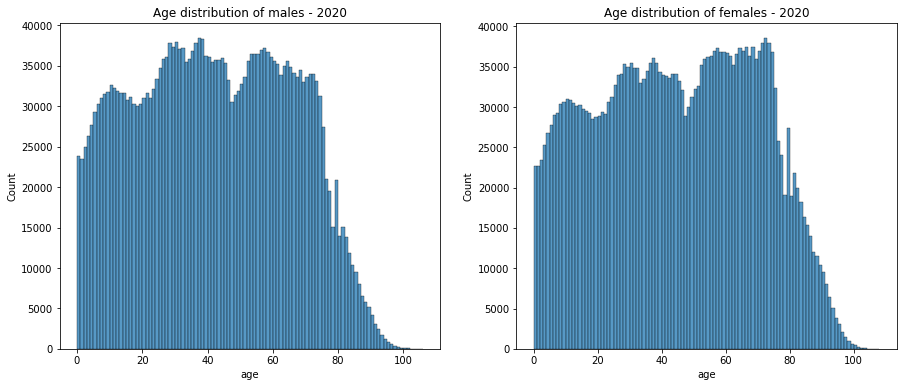

In [126]:
plot_population_age_distributions_by_sex(df, year=2020, aggregated=False)

## Simulation

In [127]:
def simulate_one_year(df, dead_df):
    df['random'] = np.random.random(len(df))
    # Get conditional probability of death conditioned on sex
    df['death_probability'] = df['sex_age_index'].map(lambda idx_value: death_probability_by_sex_and_age_index[idx_value])
    dead = df.loc[df['random'] < df['death_probability'], :]
    dead_df = dead_df.append(dead, ignore_index=True)
    df.drop(dead.index, inplace=True)
    # Update ages and related indexes and probabilities
    df['age'] += 1
    df['sex_age_index'] += 1
    return df, dead_df


def simulate_until(year, df, dead_df):
    for year in range(2020 + 1, year + 1):
        # Set fixed seed for the year
        numpy.random.seed(year)
        df, dead_df = simulate_one_year(df, dead_df)
        plot_population_age_distributions_by_sex(df, year=year, aggregated=False)
    return df, dead_df

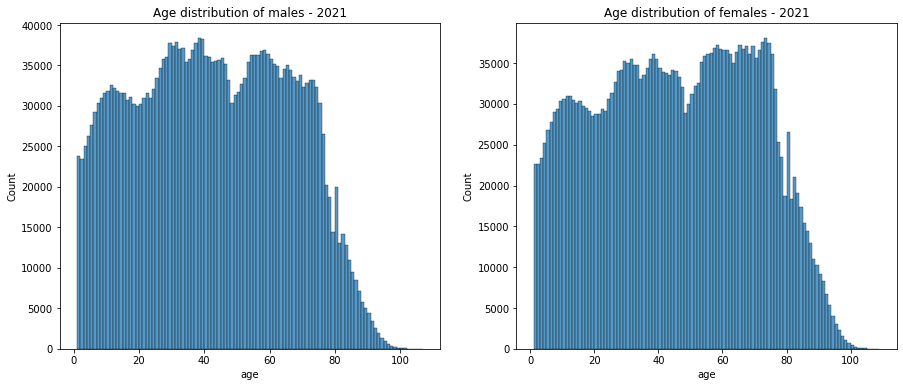

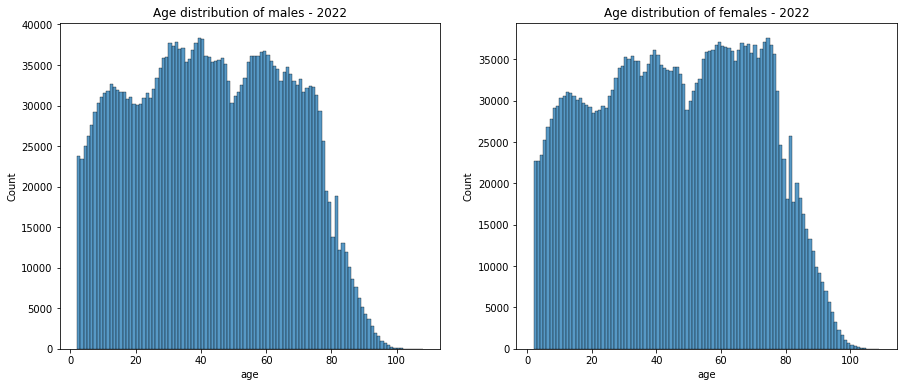

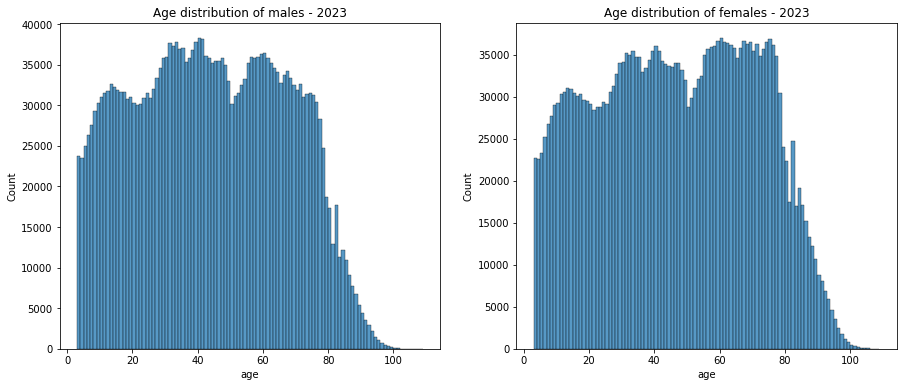

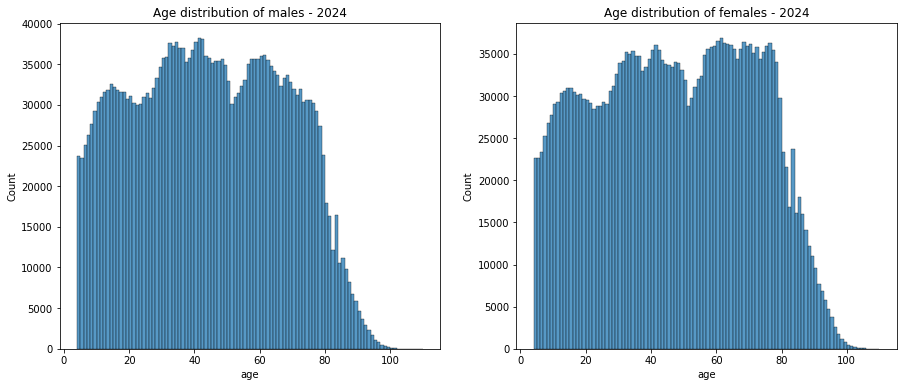

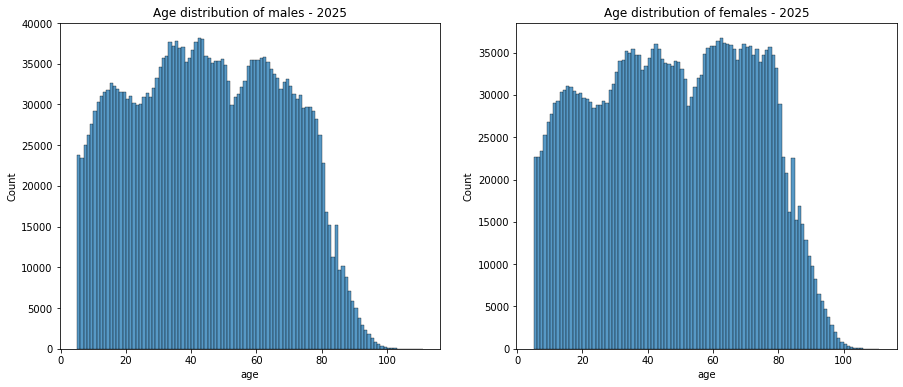

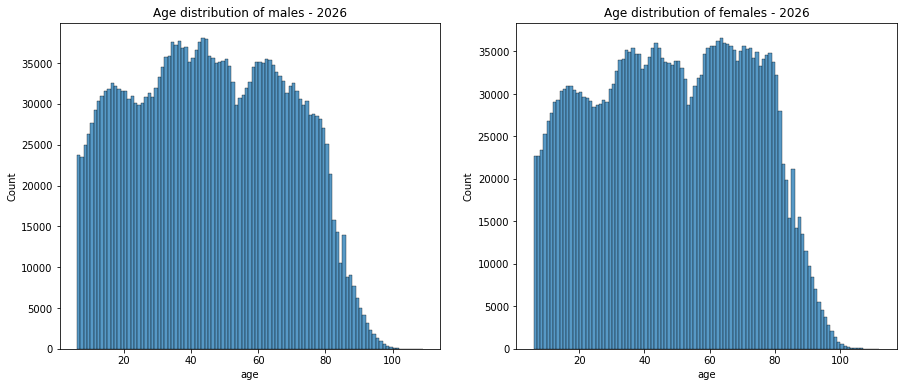

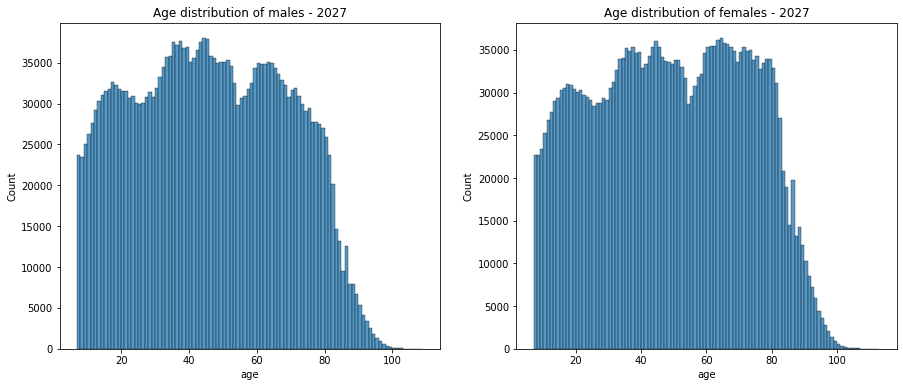

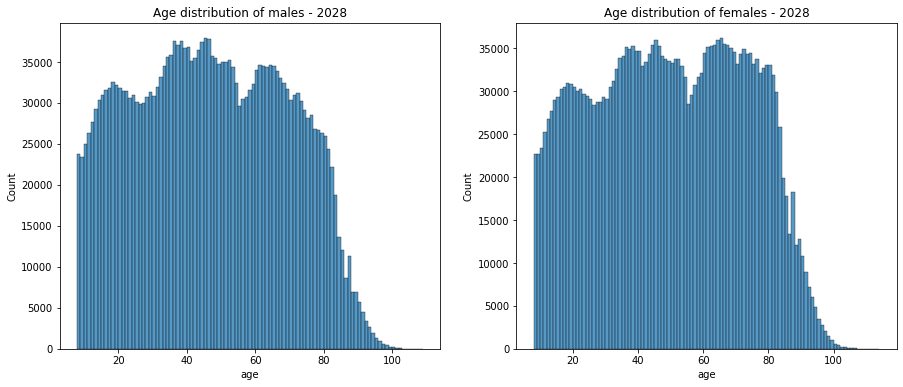

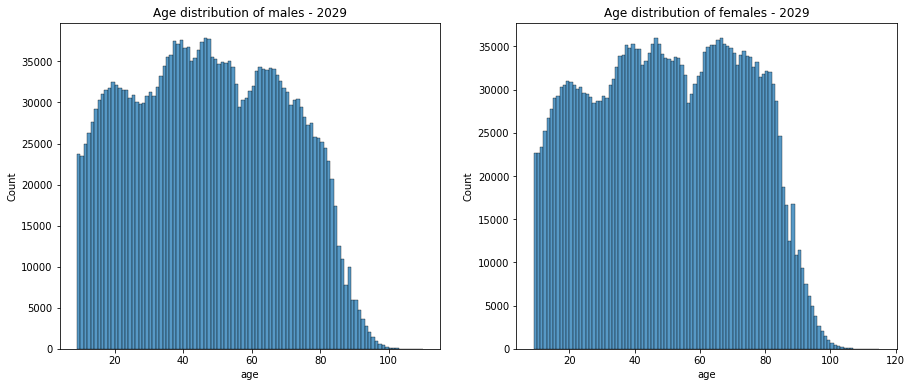

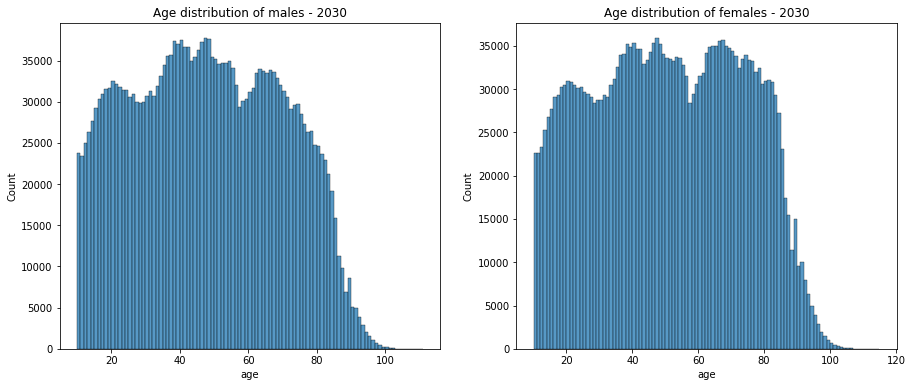

In [128]:
df, dead_df = simulate_until(2030, df, dead_df)